#Задание

Используя шаблон ноутбука для распознавания видов одежды и аксессуаров из набора **fashion_mnist**, выполните следующие действия:

1. Создайте **9** моделей нейронной сети с различными архитектурами и сравните в них значения точности на проверочной выборке (на последней эпохе) и на тестовой выборке.  Используйте следующее деление: обучающая выборка - **50000** примеров, проверочная выборка - **10000** примеров, тестовая выборка - **10000** примеров.

2. Создайте сравнительную таблицу в конце ноутбука, напишите свои выводы по результатам проведенных тестов.

# Шаблон ноутбука

##Импорт библиотек

In [ ]:
# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization

# Утилиты для to_categorical()
from tensorflow.keras import utils

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam, Adadelta

# Библиотека для работы с массивами
import numpy as np

# Библиотека для работы с таблицами
import pandas as pd

# Отрисовка графиков
import matplotlib.pyplot as plt

# Связь с google-диском
from google.colab import files

# Предварительная обработка данных
from sklearn import preprocessing

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Для загрузки датасета
from keras.datasets import fashion_mnist

# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

##Описание базы

###База: одежда, обувь и аксессуары
- Датасет состоит из набора изображений одежды, обуви, аксессуаров и их классов.
- Изображения одного вида хранятся в numpy-массиве **(28, 28)** - **x_train, x_test**.
- База содержит **10** классов: (Футболка, Брюки, Пуловер, Платье, Пальто, Сандалии/Босоножки, Рубашка, Кроссовки, Сумочка, Ботильоны) - **y_train, y_test**.
- Примеров: train - **60000**, test - **10000**.

###Вывод примеров

In [ ]:
# Загрузка датасета
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Вывод размерностей выборок

print('Размер x_train:',x_train.shape)
print('Размер y_train:',y_train.shape)
print('Размер x_test:',x_test.shape)
print('Размер y_test:',y_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Размер x_train: (60000, 28, 28)
Размер y_train: (60000,)
Размер x_test: (10000, 28, 28)
Размер y_test: (10000,)


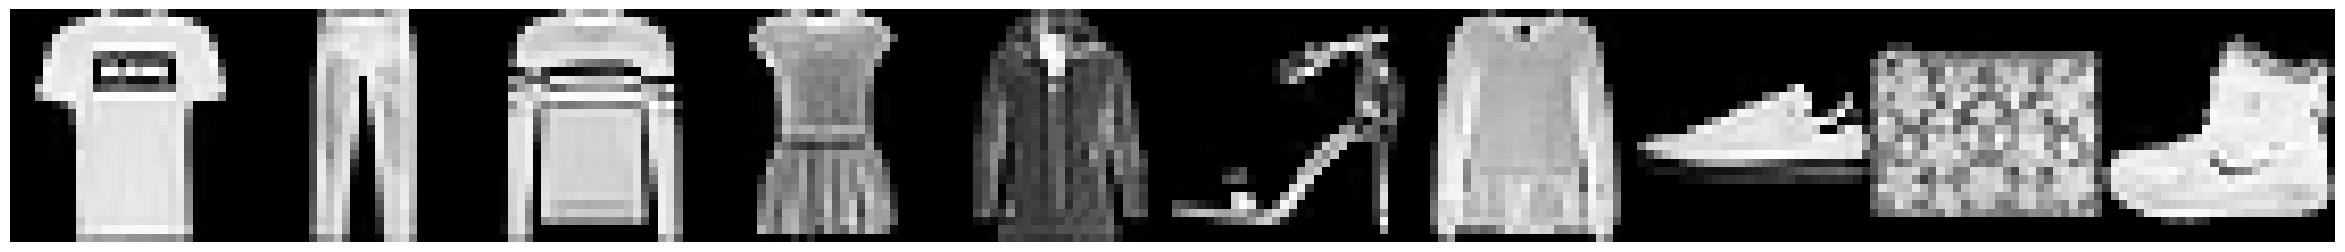

In [ ]:
# Выбор 1 изображения каждого класса
imgs = np.array([x_train[y_train==i][0] for i in range(10)])

# Соединение изображения в одну линию
imgs = np.concatenate(imgs, axis=1)

# Создание поля для изображения
plt.figure(figsize=(30, 6))

# Отрисовка итогового изображения
plt.imshow(imgs, cmap='Greys_r')

# Без сетки
plt.grid(False)

# Без осей
plt.axis('off')

# Вывод результата
plt.show()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Обучение модели 1/9 с архитектурой [128]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Обучение модели 2/9 с архитектурой [256, 128]
Обучение модели 3/9 с архитектурой [512, 256, 128]
Обучение модели 4/9 с архитектурой [128, 128, 128]
Обучение модели 5/9 с архитектурой [256, 128, 64]
Обучение модели 6/9 с архитектурой [512, 256, 128, 64]
Обучение модели 7/9 с архитектурой [128, 64, 32]
Обучение модели 8/9 с архитектурой [256, 128, 64, 32]
Обучение модели 9/9 с архитектурой [512, 256, 128, 64, 32]
     Model             Architecture  Validation Accuracy  Test Accuracy
0  Model 1                    [128]             0.881453         0.8744
1  Model 2               [256, 128]             0.888756         0.8835
2  Model 3          [512, 256, 128]             0.883353         0.8837
3  Model 4          [128, 128, 128]             0.880752         0.8755
4  Model 5           [256, 128, 64]             0.885854         0.8791
5  Model 6      [512, 256, 128, 64]             0.882053         0.8760
6  Model 7            [128, 64, 32]             0.883753         0.8800
7  Model 

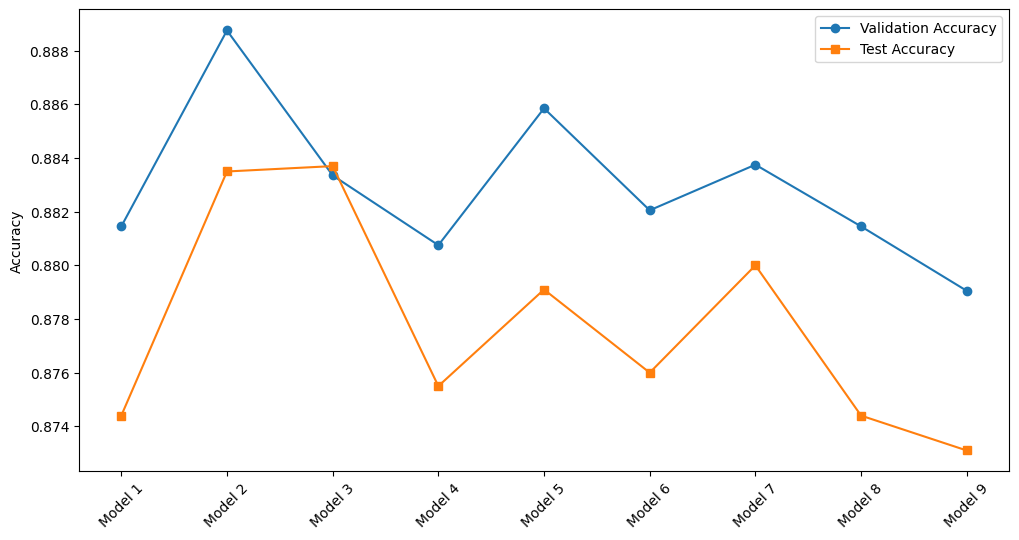

Наилучшая модель по тестовой выборке:
Model                          Model 3
Architecture           [512, 256, 128]
Validation Accuracy           0.883353
Test Accuracy                   0.8837
Name: 2, dtype: object


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

# Включение eager execution
tf.config.run_functions_eagerly(True)

# Загрузка датасета
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Нормализация данных
x_train = x_train.reshape(60000, 28*28) / 255.0
x_test = x_test.reshape(10000, 28*28) / 255.0

# Преобразование меток в one-hot encoding
y_train_cat = utils.to_categorical(y_train, 10)
y_test_cat = utils.to_categorical(y_test, 10)

# Разделение данных на обучающую и проверочную выборку
x_train, x_val, y_train_cat, y_val_cat = train_test_split(x_train, y_train_cat, test_size=0.1666, random_state=42)

# Функция для создания и компиляции модели
def create_model(layers, activation="relu"):
    model = Sequential()
    model.add(Input(shape=(28*28,)))

    for layer_size in layers:
        model.add(Dense(layer_size, activation=activation))

    model.add(Dense(10, activation="softmax"))

    # Создание нового экземпляра оптимизатора для каждой модели
    optimizer = Adam()
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

# Определение 9 различных архитектур моделей
architectures = [
    [128],
    [256, 128],
    [512, 256, 128],
    [128, 128, 128],
    [256, 128, 64],
    [512, 256, 128, 64],
    [128, 64, 32],
    [256, 128, 64, 32],
    [512, 256, 128, 64, 32]
]

# Обучение и тестирование моделей
results = []
for i, arch in enumerate(architectures):
    print(f"Обучение модели {i+1}/{len(architectures)} с архитектурой {arch}")
    model = create_model(arch)
    history = model.fit(x_train, y_train_cat, epochs=10, batch_size=128, validation_data=(x_val, y_val_cat), verbose=0)

    test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    results.append([f"Model {i+1}", arch, val_acc, test_acc])

results_df = pd.DataFrame(results, columns=["Model", "Architecture", "Validation Accuracy", "Test Accuracy"])
print(results_df)

plt.figure(figsize=(12,6))
plt.plot(results_df["Validation Accuracy"], label="Validation Accuracy", marker='o')
plt.plot(results_df["Test Accuracy"], label="Test Accuracy", marker='s')
plt.xticks(range(9), results_df["Model"], rotation=45)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

print("Наилучшая модель по тестовой выборке:")
best_model = results_df.loc[results_df["Test Accuracy"].idxmax()]
print(best_model)
